In [1]:
import pandas as pd

df = pd.read_csv("mobile_addiction_cleaned.csv")

print(df.head())
print(df.info())

   Entry number  daily_screen_time  app_sessions  social_media_usage  \
0             0                  2            29                   0   
1             1                  6            29                   1   
2             2                  9            28                   2   
3             3                  6            39                   2   
4             4                  5            37                   3   

   gaming_time  notifications  night_usage  age  work_study_hours  \
0            0             49            0   44                 5   
1            2             65            1   29                 5   
2            0             57            3   28                 7   
3            0             69            1   28                 6   
4            1             64            2   27                 4   

   stress_level  apps_installed      addicted  
0             3              35  not addicted  
1             9              21      addicted  
2       

In [2]:
print(df['addicted'].value_counts())

addicted
not addicted    6735
addicted        6583
Name: count, dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['Entry number', 'addicted'], axis=1)
y = df['addicted'].apply(lambda x: 1 if x == 'addicted' else 0)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

GaussianNB()

In [6]:
from sklearn.metrics import accuracy_score, classification_report

y_train_pred = nb_model.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

y_pred = nb_model.predict(X_test)

print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["addicted", "not addicted"]))

Training Accuracy: 0.9792566172329642
Testing Accuracy: 0.9801051051051051
              precision    recall  f1-score   support

    addicted       0.98      0.98      0.98      1352
not addicted       0.98      0.98      0.98      1312

    accuracy                           0.98      2664
   macro avg       0.98      0.98      0.98      2664
weighted avg       0.98      0.98      0.98      2664



AUC Score: 0.998170055202771


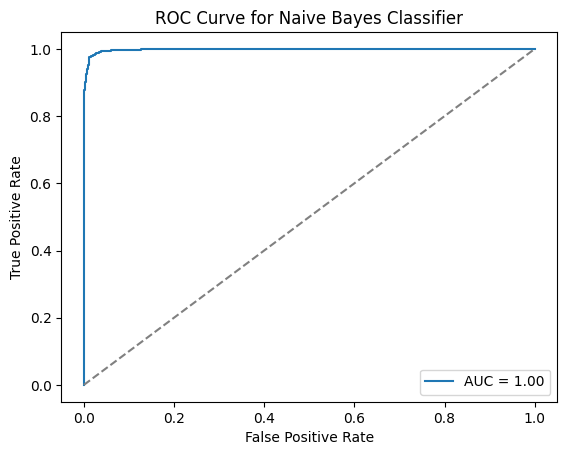

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get prediction probabilities
y_probs = nb_model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend()
plt.show()


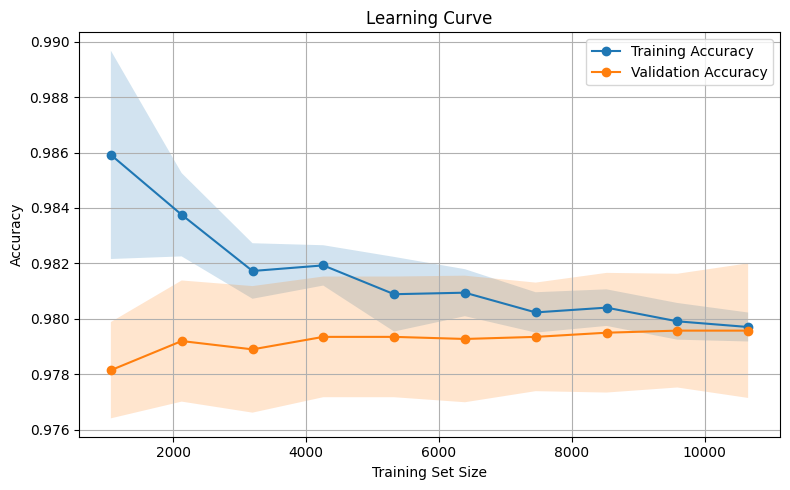

In [8]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    GaussianNB(), X, y, cv=StratifiedKFold(n_splits=5),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

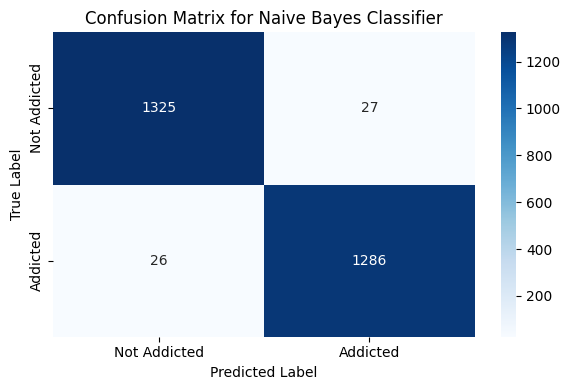

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = ["Not Addicted", "Addicted"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.tight_layout()
plt.show()